In [1]:
import uproot3 as uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


In [2]:
#f = uproot.open("/data1/hagaman/xin_files/processed_checkout_rootfiles/checkout_prodgenie_nc_pi0_overlay_run1_PF.root")["wcpselection"]
#f["T_PFeval"].items()

In [3]:
#f = uproot.open("/data1/hagaman/xin_files/processed_checkout_rootfiles/checkout_prodgenie_cc_pi0_overlay_run1_PF.root")["wcpselection"]
f = uproot.open("/data1/hagaman/xin_files/processed_checkout_rootfiles/checkout_prodgenie_nc_pi0_overlay_run1_PF.root")["wcpselection"]
#f = uproot.open("/data1/hagaman/xin_files/processed_checkout_rootfiles/checkout_prodgenie_bnb_nu_overlay_run1_PF.root")["wcpselection"]
eval_df = f["T_eval"].pandas.df(["run", "subrun", "event", "match_isFC", "truth_isCC", "truth_nuEnergy"], flatten=False)
pf_eval_df = f["T_PFeval"].pandas.df(["truth_pdg", "truth_mother", "truth_startMomentum", "truth_startXYZT", 
                                      "reco_showerKE", "truth_NprimPio", "truth_vtxX", "truth_vtxY", "truth_vtxZ"], flatten=False)
bdt_df = f["T_BDTvars"].pandas.df(["nc_delta_score"], flatten=False)
kine_df = f["T_KINEvars"].pandas.df(["kine_reco_Enu", "kine_energy_particle", "kine_particle_type"], flatten=False)

cc_pi0_df = pd.concat([eval_df, pf_eval_df, bdt_df, kine_df], axis=1, sort=False)
#cc_pi0_df = pd.concat([eval_df, pf_eval_df, bdt_df, kine_df], axis=1, sort=False).query("truth_isCC==1")


del f
del eval_df
del pf_eval_df
del bdt_df
del kine_df


In [24]:
cc_pi0_df.shape[0]

48005

In [25]:
nums_true_pi0s = []
nums_close_pi0s = []
all_pi0_dists = []

truth_pdgs = cc_pi0_df["truth_pdg"].to_numpy()
truth_mothers = cc_pi0_df["truth_mother"].to_numpy()
truth_startMomentums = cc_pi0_df["truth_startMomentum"].to_numpy()

truth_startXYZTs = cc_pi0_df["truth_startXYZT"].to_numpy()
truth_nu_vtx_Xs = cc_pi0_df["truth_vtxX"].to_numpy()
truth_nu_vtx_Ys = cc_pi0_df["truth_vtxY"].to_numpy()
truth_nu_vtx_Zs = cc_pi0_df["truth_vtxZ"].to_numpy()

muon_count = 0
muon_event_count = 0

for i in tqdm(range(cc_pi0_df.shape[0])):
    #for i in tqdm(range(21939, 21939+1)):

    num_true_pi0s = 0
    num_close_pi0s = 0
    
    truth_pdg_list = truth_pdgs[i]
    truth_mother_list = truth_mothers[i]
    truth_startMomentum_list = truth_startMomentums[i]
    
    truth_startXYZT_list = truth_startXYZTs[i]
    
    true_vtx_location = [-1000, -1000, -1000] # temporary
    
    found_muon = False

    for j in range(len(truth_pdg_list)):
        
        if truth_mother_list[j]==0 and abs(truth_pdg_list[j]) == 13: # primary muon
            
            print(i)
            
            if found_muon == False:
                muon_event_count += 1
                found_muon = False
            
            muon_count += 1
        
        
        
        if abs(truth_pdg_list[j]) == 12 or abs(truth_pdg_list[j]) == 14: # neutrino, must be at neutrino vertex
            true_vtx_location = [truth_startXYZT_list[j][0], truth_startXYZT_list[j][1], truth_startXYZT_list[j][2]]
            
        if truth_pdg_list[j] == 111: # pi0
        
            if truth_mother_list[j] == 0: # primary
                num_true_pi0s += 1

            dist_from_true_vtx = np.sqrt(
                (true_vtx_location[0] - truth_startXYZT_list[j][0])**2
                + (true_vtx_location[1] - truth_startXYZT_list[j][1])**2
                + (true_vtx_location[2] - truth_startXYZT_list[j][2])**2
            )
            
            all_pi0_dists.append(dist_from_true_vtx)

            if dist_from_true_vtx < 0.1:
                num_close_pi0s += 1

    nums_true_pi0s.append(num_true_pi0s)    
    nums_close_pi0s.append(num_close_pi0s)
    

  0%|          | 0/48005 [00:00<?, ?it/s]

437
454
726
863
1292
1524
2184
2853
2962
3361
3833
3969


KeyboardInterrupt: 

In [5]:
print(muon_count)
print(muon_event_count)

114
114


In [6]:
print(cc_pi0_df["run"].to_numpy()[21939])
print(cc_pi0_df["subrun"].to_numpy()[21939])
print(cc_pi0_df["event"].to_numpy()[21939])


7014
361
18051


In [7]:
print(np.argmax(nums_true_pi0s))
print(nums_true_pi0s[21939])


21939
3


In [8]:
truth_pdgs[21939]

array([        14,       2212,       2112,        111,       2212,
               22,         22,       2112,       2212,       2112,
       1000230500,         11,        -11,         11,         22,
               14,        111,       2212,       2112,       -211,
              111,         22,         22,       2212,       2112,
             2112,       2112,       2112,       2112,       2112,
       1000160330,         11,        -11,         11,        -11,
               22,         11,        -11,         22,       2112,
       1000010020, 1000180380,       2112,       2112,       2112,
             2212,       2112, 1000020040, 1000150320,       2212,
             2212,       2112,       2112, 1000170370,         11,
              -11,         11,         22,         11,        -11,
               22,         22, 1000180400, 1000180400, 1000180360,
       1000180400, 1000260550, 1000180400, 1000180400, 1000180400,
             2112, 1000180400,       2212,       2112,       2

In [9]:
truth_mothers[21939]

array([   0,    0,    0,    0,    0,    4,    4,    3,    3,    3,    3,
          7,    7,    6,  131,    0,    0,    0,    0,    0,    0,  654,
        654,  653,  653,  653,  653,  653,  653,  653,  653,  656,  656,
        655,  655,  744,  752,  752,  695,  658,  658,  658,  652,  652,
        652,  652,  652,  652,  652,  651,  651,  651,  651,  651,  881,
        650,  650,  650, 1097, 1097, 1137, 1137,  904,  904,  904,  902,
        902,  893,  893,  893,  893,  893, 1209,  892,  892,  892, 1216,
       1216, 1216, 1216, 1216, 1216, 1216,  891,  891, 1235, 1235, 1235,
       1241, 1241, 1241, 1241, 1246, 1246, 1262,  886,  886,  665,  664,
        663,  663, 1370,  662,  662, 1136, 1136, 1136, 1403, 1398, 1398,
       1388, 1388, 1185, 2267, 2271, 1159, 1159, 2359, 2363, 1378,  660,
        660,  660,  660,  660, 2635, 2635, 2633, 2633, 2633,  659,  659,
        659,  659,  659, 2664, 2663, 2663], dtype=int32)

In [10]:
cc_pi0_df["truth_nuEnergy"].to_numpy()[21939]

822.90656

In [26]:
truth_pdgs[437]

array([        14,       2112,        111,       2212,         22,
               22,       2112,       2112, 1000180390, 1000260560,
               11,        -11,         22,         11,        -11,
               22,         22,         11,         11,        -11,
               13,       2212,       2112,       2112, 1000190390,
               11,         11,         11,         14,       2112,
             2112,       2112,       2112,       2112, 1000170350,
             2212, 1000180400, 1000180400, 1000180400, 1000180400,
       1000180400, 1000180400, 1000180400, 1000180400,       2112,
       1000180400, 1000180400, 1000180400,       2112, 1000180400,
       1000180400, 1000180400, 1000180400, 1000180400, 1000180400,
       1000180400,       2212], dtype=int32)

In [27]:
truth_mothers[437]

array([   0,    0,    0,    0,    3,    3,    2,    2,    2,    8,    6,
          6,  182,    5,    5,  249,  248,  248,  286,  286,    0,    0,
        582,  582,  582,  581,  581,  581,  581,  581,  581,  581,  581,
        581,  581,  807,  805,  805,  804,  804,  804,  804,  804,  804,
        803,  803, 1053, 1053, 1053, 1053,  802,  589,  589,  589,  589,
        589,  589], dtype=int32)

In [11]:
print(truth_pdgs[21939][3], truth_pdgs[21939][16])

111 111


In [12]:
print(truth_startXYZTs[21939][3], truth_startXYZTs[21939][16])

[ 180.3592   152.5564   316.19836 3458.498  ] [ 135.90643   85.18726  662.3689  4344.7734 ]


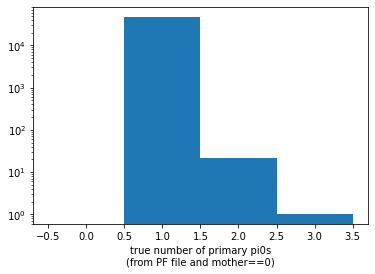

1 3


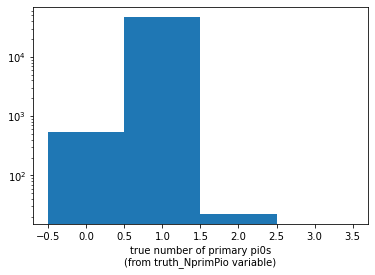

0 2


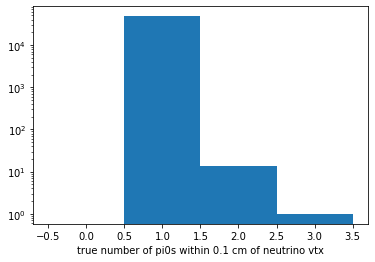

1 3


In [13]:
plt.figure()
n, bins, patches = plt.hist(nums_true_pi0s, range=(-0.5, 3.5), bins=4)
plt.xlabel("true number of primary pi0s\n(from PF file and mother==0)")
plt.yscale("log")
plt.show()

print(np.min(nums_true_pi0s), np.max(nums_true_pi0s))


nums_true_pi0s_v2 = cc_pi0_df["truth_NprimPio"].to_numpy()

plt.figure()
n2, bins, patches = plt.hist(nums_true_pi0s_v2, range=(-0.5, 3.5), bins=4)
plt.xlabel("true number of primary pi0s\n(from truth_NprimPio variable)")
plt.yscale("log")
plt.show()

print(np.min(nums_true_pi0s_v2), np.max(nums_true_pi0s_v2))

plt.figure()
n3, bins, patches = plt.hist(nums_close_pi0s, range=(-0.5, 3.5), bins=4)
plt.xlabel("true number of pi0s within 0.1 cm of neutrino vtx")
plt.yscale("log")
plt.show()

print(np.min(nums_close_pi0s), np.max(nums_close_pi0s))

"""plt.figure()
n4, bins, patches = plt.hist(all_pi0_dists, range=(0, 5))
plt.xlabel("pi0-true vtx dist (cm)")
plt.yscale("log")
plt.show()

print(np.min(all_pi0_dists), np.max(all_pi0_dists))"""
pass


In [14]:
# from from PF file and mother==0

print(f"ratio of 1 pi0 to 2 pi0:", n[1] / n[2])

# ratio of 1pi0 to 2pi0 events in run 1:

# inf for CC Pi0 file

# 2284.90 for NC Pi0 file

# 14.456 for nu overlay file
# 12.38 for CC events in the nu overlay file
# 20.177 for NC events in the nu overlay file


ratio of 1 pi0 to 2 pi0: 2284.904761904762


In [15]:
# from truth_NprimPio variable

print(f"ratio of 1 pi0 to 2 pi0:", n2[1] / n2[2])

# ratio of 1pi0 to 2pi0 events in run 1:

# inf for CC Pi0 file

# 2156.318 for NC Pi0 file

# 14.51 for nu overlay file
# 12.46 for CC events in the nu overlay file
# 20.12 for NC events in the nu overlay file


ratio of 1 pi0 to 2 pi0: 2156.318181818182


In [16]:
print(np.argmin(nums_true_pi0s_v2))
print(nums_true_pi0s_v2[253])

253
0


In [17]:
cc_pi0_df["truth_pdg"][253]


array([        14,        111, 1000180400,         22,         11,
              -11,         22,         22,         22,         22,
               11,         11,         11,         11,        -11,
               22,         22,         22,         22,         22,
               22,         22,         22,         11,        -11,
              -11,         11,        -11,         11,         11,
              -11,         11], dtype=int32)

In [18]:
cc_pi0_df["truth_mother"][253]


array([  0,   0,   0,   2,   6,   6,  13,  13,  12,  12,  32,  27,  27,
        15,  15, 263, 262, 262, 262, 262, 262, 262, 262, 338, 338, 320,
       313, 313, 308, 307, 285, 278], dtype=int32)

In [19]:
cc_pi0_df["truth_mother"][253]


array([  0,   0,   0,   2,   6,   6,  13,  13,  12,  12,  32,  27,  27,
        15,  15, 263, 262, 262, 262, 262, 262, 262, 262, 338, 338, 320,
       313, 313, 308, 307, 285, 278], dtype=int32)

In [20]:
cc_pi0_df["truth_startMomentum"][253]


array([[ 4.88777943e-02,  8.41147676e-02,  5.51745355e-01,
         5.60256422e-01],
       [-8.94745812e-03, -2.06361309e-01,  5.17775297e-01,
         5.73563397e-01],
       [-3.56914178e-02,  1.20144494e-01,  6.42893538e-02,
         3.72158051e+01],
       [-1.29179610e-02, -2.16974616e-01,  5.18364847e-01,
         5.62091589e-01],
       [-2.79309507e-03, -4.95947935e-02,  1.17330812e-01,
         1.27413601e-01],
       [-1.01248119e-02, -1.67378888e-01,  4.01031792e-01,
         4.34677988e-01],
       [-1.91386491e-02, -1.25123665e-01,  3.80020887e-01,
         4.00547266e-01],
       [-6.71908818e-03, -1.70916668e-03,  7.49356253e-03,
         1.02088628e-02],
       [-6.46109518e-04, -1.31022064e-02,  3.38481106e-02,
         3.63012403e-02],
       [-2.31054402e-03, -4.02670121e-03,  1.48424702e-02,
         1.55515876e-02],
       [-2.68123415e-03, -3.93639179e-03,  1.49227418e-02,
         1.56727005e-02],
       [ 8.54239101e-04, -1.14076873e-02,  2.25637369e-02,
      

In [21]:
cc_pi0_df["truth_NprimPio"][253]


0

In [22]:
#np.set_printoptions(linewidth=400)

print(cc_pi0_df["truth_pdg"][21939][:20])
print(cc_pi0_df["truth_mother"][21939][:20])
print(cc_pi0_df["truth_startMomentum"][21939][:20])

[        14       2212       2112        111       2212         22
         22       2112       2212       2112 1000230500         11
        -11         11         22         14        111       2212
       2112       -211]
[  0   0   0   0   0   4   4   3   3   3   3   7   7   6 131   0   0   0
   0   0]
[[ 1.31601676e-01  5.06655797e-02  4.04103577e-01  4.28001970e-01]
 [ 4.09412645e-02 -2.91826159e-01  1.73213795e-01  9.98597026e-01]
 [-4.40331511e-02  2.35806908e-02  2.85728097e-01  9.83320177e-01]
 [ 6.56615272e-02  3.24843712e-02 -1.54623270e-01  2.17930511e-01]
 [-2.71109492e-01 -6.56777173e-02  1.92406967e-01  9.97591496e-01]
 [ 3.43118375e-03  6.29565027e-03  2.50155516e-02  2.60227993e-02]
 [ 6.22303449e-02  2.61887200e-02 -1.79638818e-01  1.91907719e-01]
 [-1.07602172e-01 -8.10087100e-03  6.73767179e-02  9.48138475e-01]
 [ 5.13137970e-03 -4.88660820e-02 -9.18317661e-02  9.44034755e-01]
 [ 6.01321757e-02  6.94734156e-02 -3.07206437e-02  9.44547117e-01]
 [-3.00642423e-04  1.1

In [23]:
# CONCLUSION: only 1pi0 events simulated in the NC Pi0 and CC Pi0 overlay files
# >= 2pi0 events are present in the nu overlay files
# need to be careful about e